# Phase 3 Project: Syriatel Customer Churn
## by Jimmy Mumo

# Introduction

### Overview

The telecommunications industry is an ever-evolving landscape and retaining customers is of utmost importance for sustainable business success. 
Customer churn is a phenomenon where the subscribers discontinue services for whatever reason. This poses a challenge for telecom companies as it directly affects revenue streams as well as market competitiveness as customers may opt to seek the services of rival telecom companies.

The project structure is as follows:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Exploratory Data Analysis
5. Data Modelling
6. Evaluation
7. Recommendations and Conclusions

# 1. Business Understanding

Every business faces the challenge of keeping a loyal and consistent consumer base. For this case SyriaTel, being a telecommunications company, faces the challenge of customer churn at a higher rate because the telecommunications market is highly competetive and ever-changing. Customer churn actively hurts the business growth and even leads to huge losses if not addressed

In order to address this issue adequately, the business can turn to utilise machine learning in order to better understand what causes customer churn and how to combat it. 

By looking at the customer tastes and trends present within the consumer base data, SyriaTel can gain specific information about their consumers and how best to serve them. This prevents customer churn and allows SyriaTel to maximise profits. 

By using Machine learning, SyriaTel can develop a model that predicts customer churn. This model caters for the loss of revenue that customer churn creates as well as helps bolster the existing relationship that the company has with its customers thus helping the company grow its market.

# 2. Data Understanding 
The data used for this project is sourced from Kaggle. This section dives into understanding the structure of the data and its idiosyncracies. 

In [721]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier


# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score, precision_score, auc  
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier


# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE




In [722]:
# Loading the data as a pandas dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [723]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [724]:
# Size of the dataset
df.size

69993

In [725]:
# Shape of the dataset/ Number of records
df.shape

(3333, 21)

In [726]:
# Displaying the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [727]:
# Previewing the bottom rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


From the above, the SyriaTel Customer Churn dataset consists of 3333 rows of data records and 21 columns of features, with the final feature (churn) being the target variable. 

The Columns are broken down to these categories:
1. **State**: this is the state in which the customer resides
2. **Account Length**: This refers to the number of months customers had an account with the company.
3. **Area code**: this is the customers area code.
4. **Phone Number**: the customer's phone number.
5. **International plan**: this indicates whether the customer is subscribed to an international calls plan. It is a binary feature (yes/no).
6. **Voice mail plan**: indicates whether a customer has a voicemail plan. Also a binary feature
7. **Number vmail messages**: this is a numerical variable showing the total number of voicemails the customer received.
8. **Total day minutes**: The total number of calls made by the customer during the day
9. **Total Day Calls**: The total number of calls made by the customer during the day.
10. **Total Day Charge**: The total cost incurred by the customer for calls made during the day.
11. **Total Eve Minutes**: The total duration (in minutes) of calls made by the customer during the evening.
12. **Total Eve Calls**: The total number of calls made by the customer during the evening.
13. **Total Night Minutes**: The total duration (in minutes) of calls made by the customer during the night.
14. **Total Night Calls**: The total number of calls made by the customer during the night.
15. **Total Night Charge**: The total cost incurred by the customer for calls made during the night.
16. **Total Intl Minutes**: The total duration (in minutes) of international calls made by the customer.
17. **Total Intl Calls**: The total number of international calls made by the customer.
18. **Total Intl Charge**: The total cost incurred by the customer for international calls.
19. **Customer Service Calls**: The number of calls made by the customer to customer service.
20. **Churn**: Indicates if the customer has terminated their contract with the company. (Yes/No).

The following section will look into finding anomalies present within the dataset.

# 3. Data Preparation

This section aims to deal with improving the quality of the dataset before any manipulations can take place.


In [728]:
# Looking for duplicates and missing values 

duplicate_values = df.duplicated().sum()

missing_values = df.isna().sum()

print (f'Duplicated values:', duplicate_values)
print(f'missing values:', missing_values)

Duplicated values: 0
missing values: state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


The above analysis shows that there are no missing/null values and duplicate values.

In [729]:
# Checking for place holders
columns = df
unique_values = {}
for col in columns:
    unique_values[col] = df[col].unique()
unique_values

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'account length': array([128, 107, 137,  84,  75, 118, 121, 147, 117, 141,  65,  74, 168,
         95,  62, 161,  85,  93,  76,  73,  77, 130, 111, 132, 174,  57,
         54,  20,  49, 142, 172,  12,  72,  36,  78, 136, 149,  98, 135,
         34, 160,  64,  59, 119,  97,  52,  60,  10,  96,  87,  81,  68,
        125, 116,  38,  40,  43, 113, 126, 150, 138, 162,  90,  50,  82,
        144,  46,  70,  55, 106,  94, 155,  80, 104,  99, 120, 108, 122,
        157, 103,  63, 112,  41, 193,  61,  92, 131, 163,  91, 127, 110,
        140,  83, 145,  56, 151, 139,   6, 115, 146, 185, 148,  32,  25,
        179,  67,  19, 170,

The above shows that there are no placeholder values within the dataset 


# 4. Exploratory Data Analysis

In this section, the data is analysed using univariate, bivariate and multivariate techniques.

This stage allows for ease of feature engineering and model building as the feature vector as well as target variable relationships are explored.

### 4.1 Univariate EDA

This analysis looks into analyzing individual variables. Starting the target variable Churn, it is analyzed to understand its distribution. It holds boolean values: True or False, showing whether a customer will churn or not.

<function matplotlib.pyplot.show(close=None, block=None)>

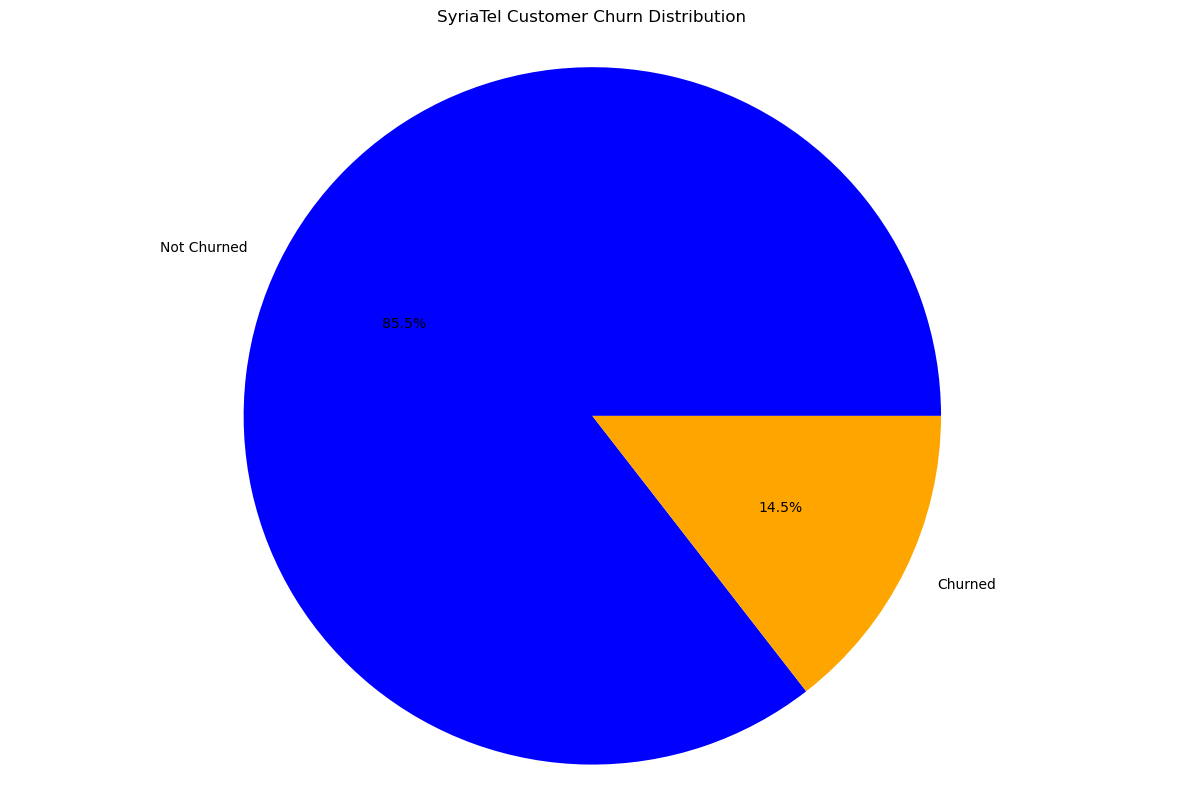

In [730]:
# Visually Representing churn

# Churn distribution
churn_counts = df['churn'].value_counts()

# Create a new figure 
plt.figure(figsize=(15, 10))

# Pie chart creation
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('SyriaTel Customer Churn Distribution')
plt.axis('equal')
plt.show

### Analysis

The above diagram represents the target variable customer churn. From it we can draw that approximately 14.5% of the customer base churned and 85.5% have not churned.

The churn rate is relatively low showing that SyriaTel have a good Customer retention rate.

Next, the distribution of the feature variables

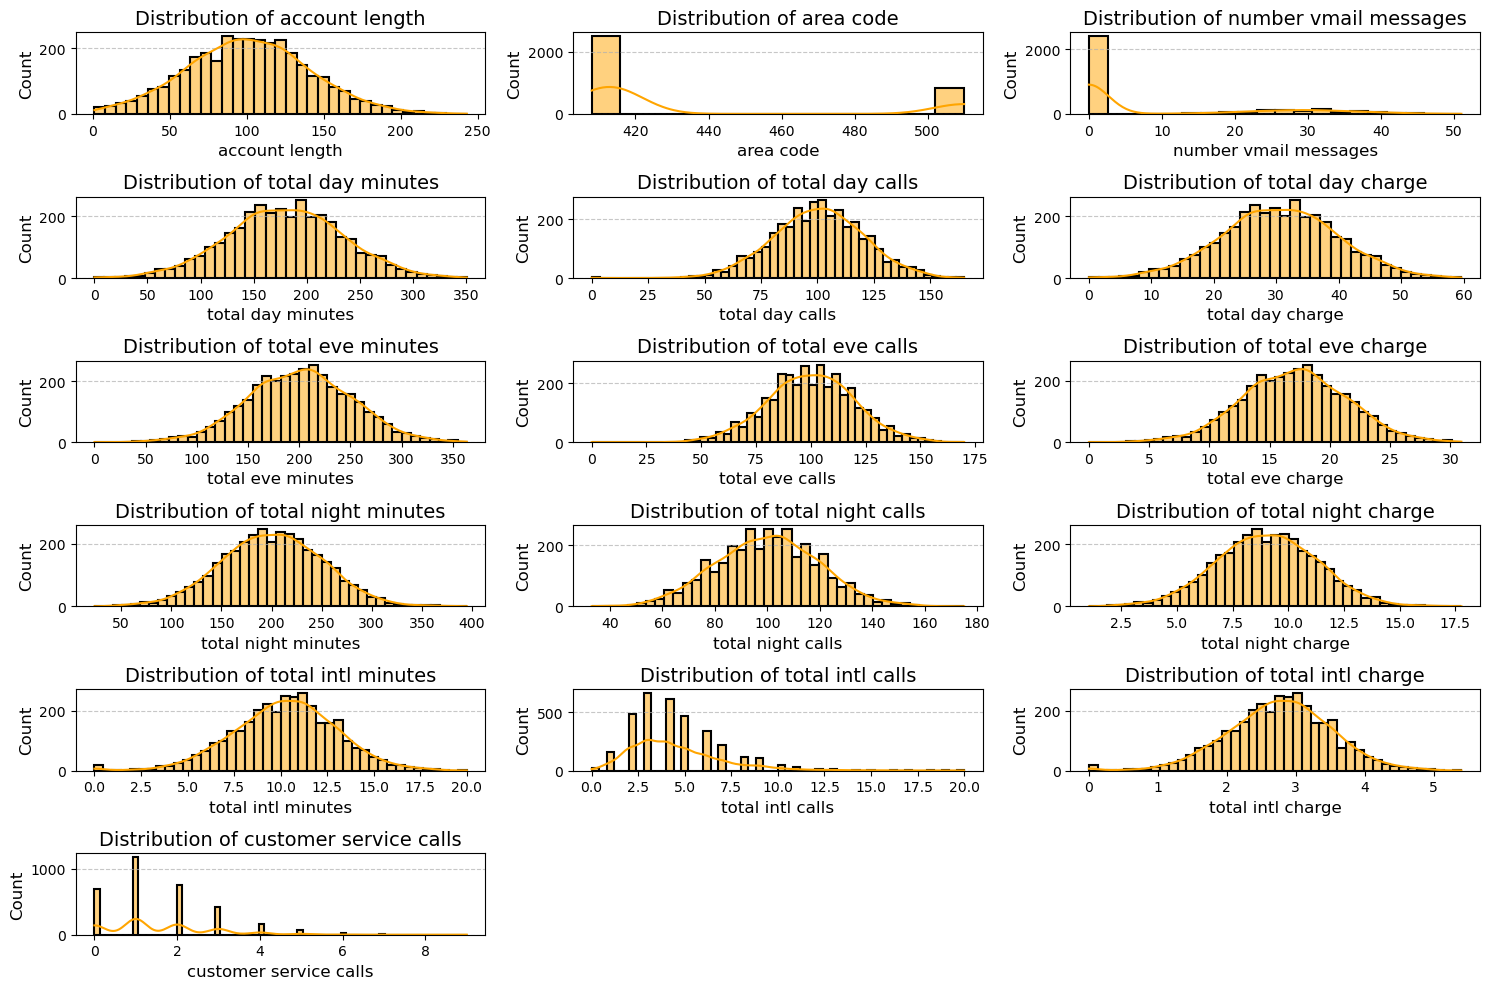

In [731]:
# Access the numeric columns
numeric_features = df.select_dtypes(include='number').columns.tolist()

# Subplot layout
num_features = len(numeric_features)
rows = (num_features - 1) // 3 + 1
cols = min(3, num_features)

# Subplot creation
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numeric features
for ax, feature in zip(axes, numeric_features):
    sns.histplot(df[feature], kde=True, ax=ax, color='orange', edgecolor='black', linewidth=1.5)
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove any excess subplots
for ax in axes[num_features:]:
    fig.delaxes(ax)

# Adjust subplot layout
fig.tight_layout()

# Display the plot
plt.show()

The feature vectors: account length, total day minutes,total day calls, total eve minutes, total eve calls, total day charge, total eve charge, total night minutes, total night calls, total night charge , total intl minutes and total intl charge exhibit normal distribution.

Total Intl calls and customer service calls are fairly right skewed. Area codes are discrete columns. THe majority of the instances of number of voicecall messages are 0, with the remaining values being platykurtic

### Bivariate Analysis

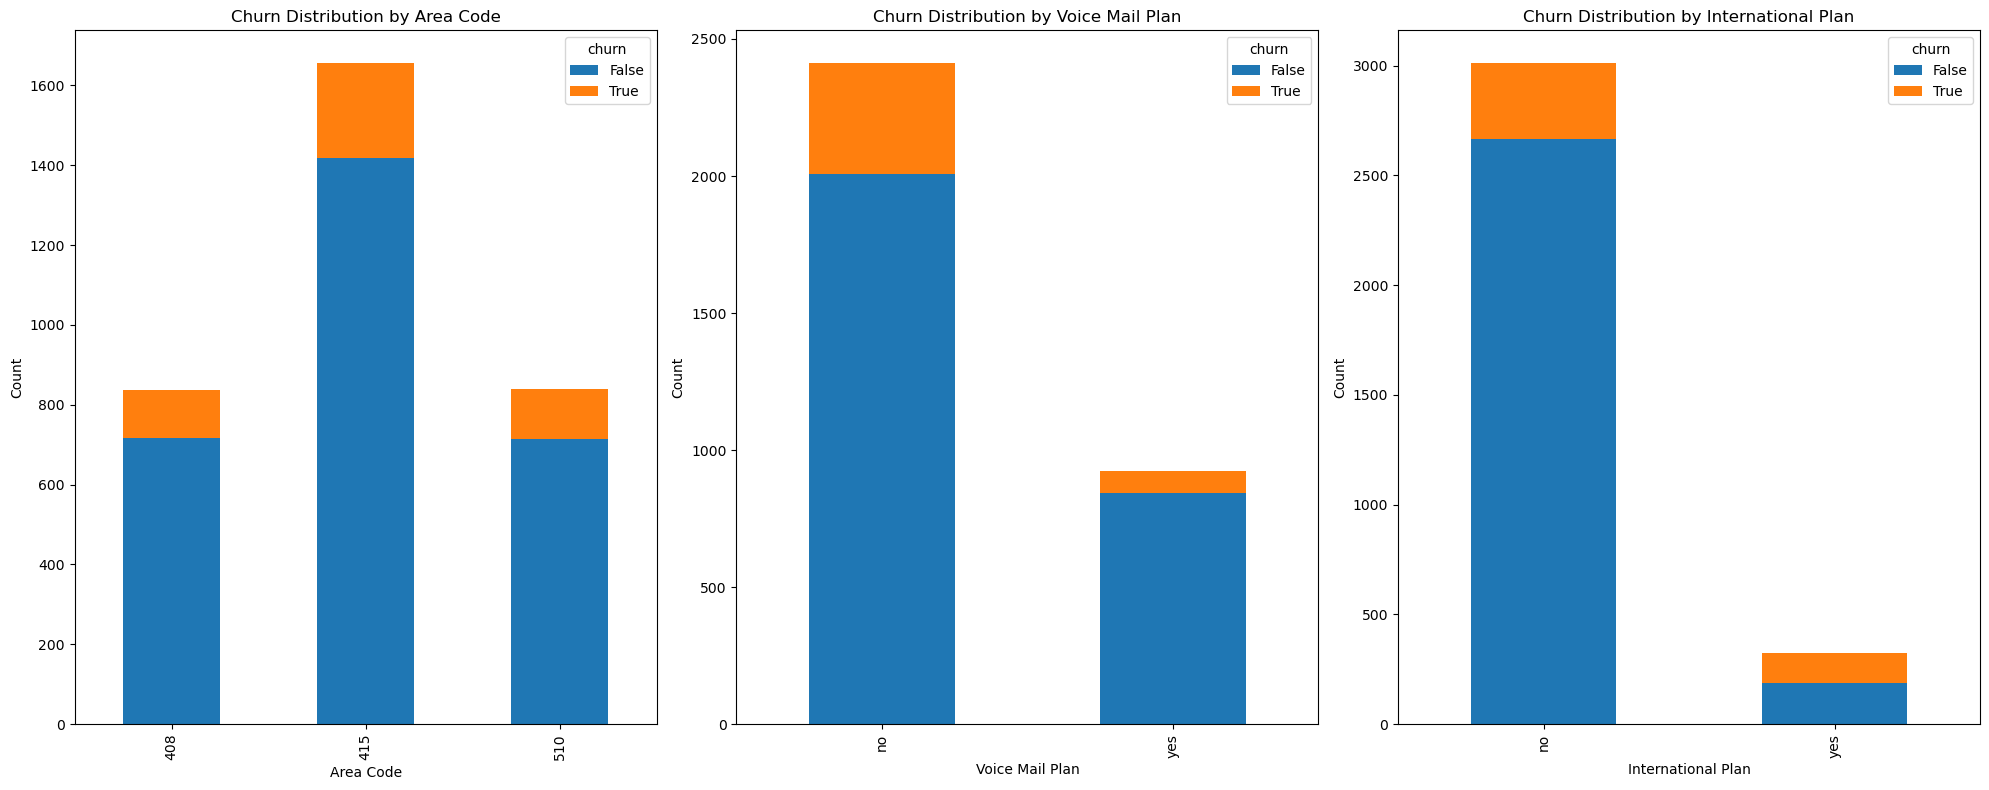

In [732]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Univariate Analysis: Churn distribution across "Area Code"
df["churn"].groupby(df["area code"]).value_counts().unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Churn Distribution by Area Code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

# Univariate Analysis: Churn distribution across "Voice Mail Plan"
df["churn"].groupby(df["voice mail plan"]).value_counts().unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Churn Distribution by Voice Mail Plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

# Univariate Analysis: Churn distribution across "International Plan"
df["churn"].groupby(df["international plan"]).value_counts().unstack().plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Churn Distribution by International Plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()


### Insights

From the above, the churn rates vary in the different area codes, voice mail plans and international plans.
1. Area code 415 has a relatively high churn rate compared to area codes 408 and 510. It should also be noted that area code 415 has a larger customer base compared to the others. 
2. Customers without a voice mail plan have a higher churn rate than those without.
3. Customers with an international plan have a higher churn rate than those without.


### Highest Statistic Churn Rate States

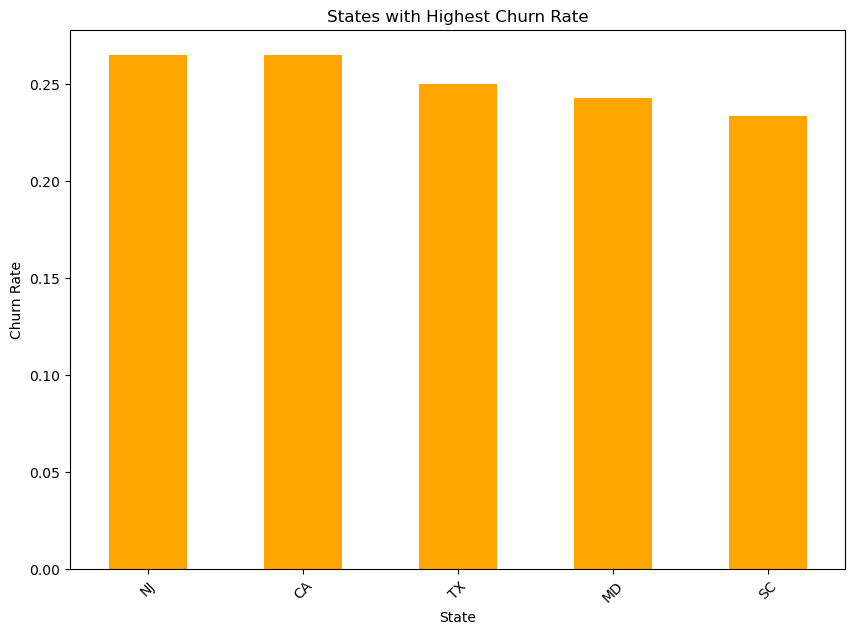

In [733]:
# Calculate the churn rate for each state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)

# Select the top states with the highest churn rate
top_states_churn = state_churn_rate.head(5)  # Adjust the number 5 to the desired number of states

# Visualize the top states with the highest churn rate using a bar plot
plt.figure(figsize=(10, 7))
top_states_churn.plot(kind='bar', color='orange')  # Use the color #1c3a96 for aesthetics
plt.title('States with Highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


The top five states that have the highest churn rate are: New Jersey, California, Texas, Maryland and South Carolina respectively.

### Lowest Statistic Churn Rate States

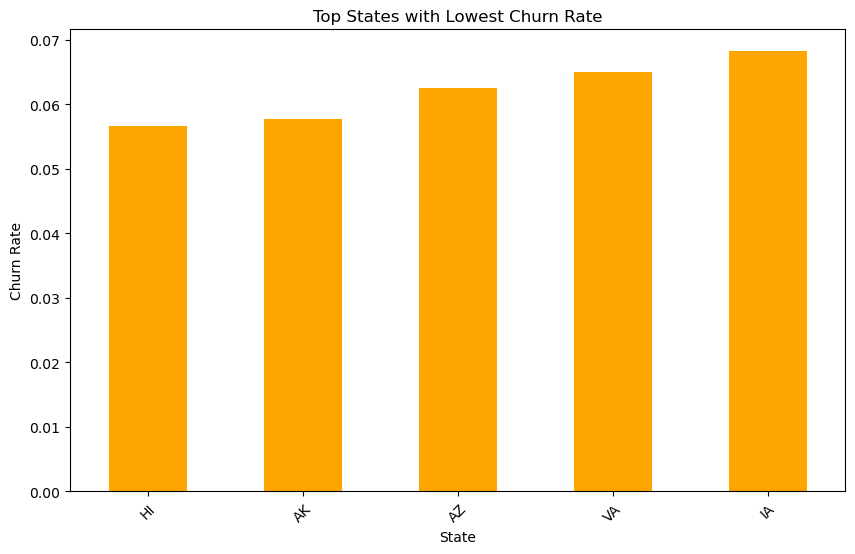

In [734]:
# Calculate churn rate for each state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values()

# Select the top N states with the lowest churn rate
bottom_states_churn = state_churn_rate.head(5)  # Adjust the number 5 to the desired number of states

# Visualize the top states with the lowest churn rate using a bar plot
plt.figure(figsize=(10, 6))
bottom_states_churn.plot(kind='bar', color='orange')  # Use the color #1c3a96 for aesthetics
plt.title('Top States with Lowest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


## Handling outliers

In this step, the relationship between two variables in the dataset is analysed.

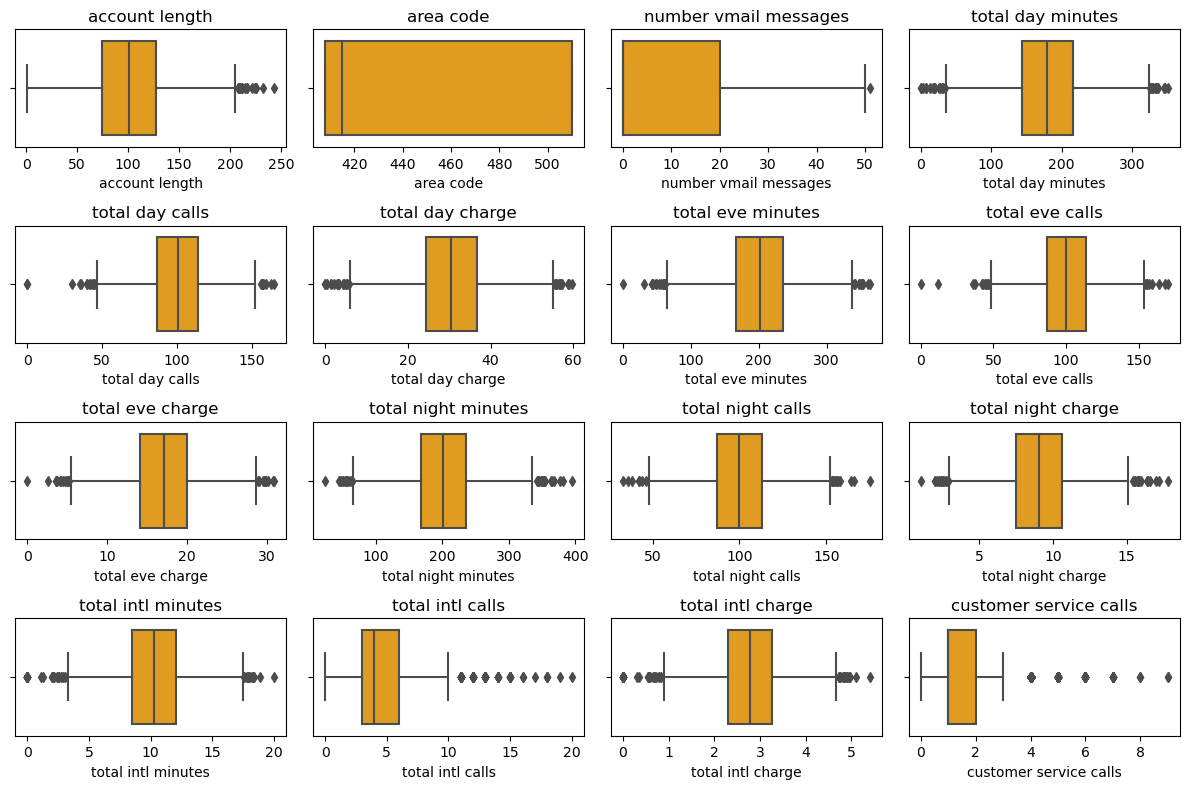

In [735]:
# Visualizing summary statistics with box plots for numerical columns (colored orange)

# Retrieve numerical columns for visualization
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create box plots for each numerical column with orange color
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(col)

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


## Multi-variate Analysis

This stage involves analysis multiples variables at simultaneously with particular focus on their relation to the target variable. This is achieved through the use of a correlation matrix.

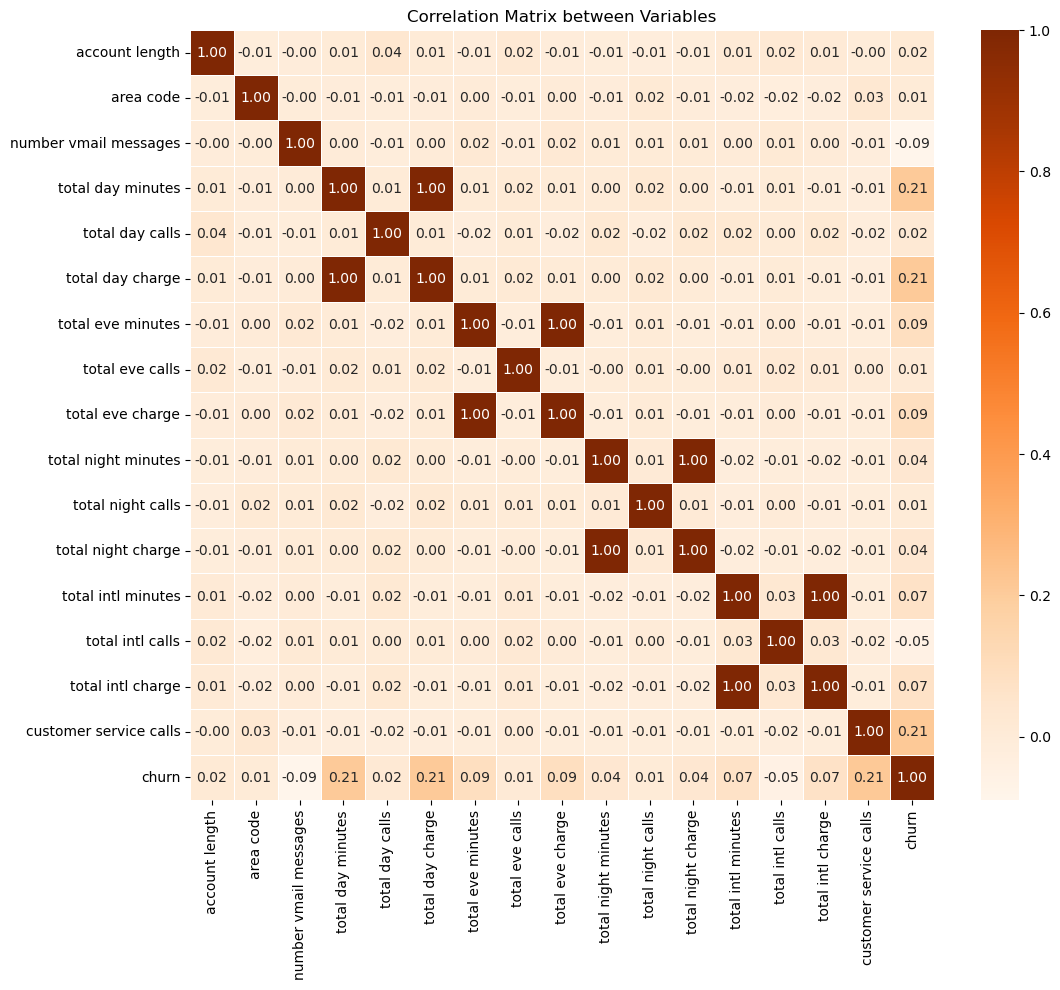

In [736]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show();

### Insights

1. Customer service calls and churn have a weak positive correlation (0.21). This means that customers who make more customer service calls are slightly more likely to churn. 
2. Total day minutes and churn have a weak positive correlation (0.21). This means that customers who use their phones more during the day are slightly more likely to churn. 
3. Total evening minutes and churn have a weak positive correlation (0.09). This means that customers who use their phones more in the evening are slightly more likely to churn.
Total international minutes and churn have a weak positive correlation (0.07). 

### Feature Engineering 

Feature engineering is the process of selecting and transforming the input variables of the dataset in order to improve machine learning algorithm performance.

For this project the process involves merging related features thus making the dataset less redundant

In [737]:
# Merge all call activity and charges
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']

# Drop the original features
df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
           'total eve calls', 'total night calls', 'total intl calls',
          'total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)

# check on affected changes
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,customer service calls,churn,total charges,total minutes,total calls
0,KS,128,415,382-4657,no,yes,25,110,1,False,75.56,717.2,303
1,OH,107,415,371-7191,no,yes,26,123,1,False,59.24,625.2,332
2,NJ,137,415,358-1921,no,no,0,114,0,False,62.29,539.4,333
3,OH,84,408,375-9999,yes,no,0,71,2,False,66.80,564.8,255
4,OK,75,415,330-6626,yes,no,0,113,3,False,52.09,512.0,359


### Data Preprocessing

### One-Hot Encoding 
One-Hot Encoding is a technique for converting the categorical variables with no inherent order into a format that is readable to the machine learning algorithm.


In [738]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'customer service calls', 'churn', 'total charges',
       'total minutes', 'total calls'],
      dtype='object')


In [739]:
# Encode binary categorical variables
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# Drop the "phone number" column
df.drop(columns=['phone number'], inplace=True)

# If using label encoding for "state" column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])


# Verify the changes
print(df.head())

   state  account length  area code  international plan  voice mail plan  \
0     16             128        415                   0                1   
1     35             107        415                   0                1   
2     31             137        415                   0                0   
3     35              84        408                   1                0   
4     36              75        415                   1                0   

   number vmail messages  total day calls  customer service calls  churn  \
0                     25              110                       1  False   
1                     26              123                       1  False   
2                      0              114                       0  False   
3                      0               71                       2  False   
4                      0              113                       3  False   

   total charges  total minutes  total calls  
0          75.56          717.2        

### Scaling the data

This is an important step in ensuring numerical features are of similar scale. This step takes into account machine learning algorithms that are sensitive to scales like K-Nearest Neighbors and Support Vector machines.

In [740]:
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df[[column]])

# Iterate through numerical columns and scale them
for column in df.select_dtypes(include=[np.number]).columns:
    df[[column]] = scaling(column)

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,customer service calls,churn,total charges,total minutes,total calls
0,0.32,0.524793,0.068627,0.0,1.0,0.490196,0.666667,0.111111,False,0.718793,0.720659,0.497778
1,0.70,0.438017,0.068627,0.0,1.0,0.509804,0.745455,0.111111,False,0.495903,0.567505,0.626667
2,0.62,0.561983,0.068627,0.0,0.0,0.000000,0.690909,0.000000,False,0.537558,0.424671,0.631111
3,0.70,0.342975,0.000000,1.0,0.0,0.000000,0.430303,0.222222,False,0.599153,0.466955,0.284444
4,0.72,0.305785,0.068627,1.0,0.0,0.000000,0.684848,0.333333,False,0.398252,0.379058,0.746667


### Data Split

Before modelling, the data is split into training and test sets so as to enable the model to be adaptable.


In [741]:
# Separate features from the target variable
# Define the target variable and the feature matrix
y = df['churn']  
X = df.drop('churn', axis=1)  

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (2666, 11)
Test set size: (667, 11)


### SMOTE

Synthetic Minority Oversampling Technique ("SMOTE") is an oversampling technique that is generated for the minority class. It functions to overcome overfitting that occurs as a result of oversampling.

In [742]:
#instantiate SMOTENC

smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#  X_train_smote and y_train_smote are the feature matrix and target variable of the oversampled training data
print("Shape of X_train_smote:", X_train_smote.shape)
print("\nValue counts of y_train_smote:\n", y_train_smote.value_counts())

Shape of X_train_smote: (4568, 11)

Value counts of y_train_smote:
 False    2284
True     2284
Name: churn, dtype: int64


# 5. Data Modelling 

- Logistic Regression 
- Decision Tree
- Random Forest 
- XG Boost

### 5.1 Logistic Regression

This is a statistical technique that is used for binary classification.
It aims to estimate the probability of an observation belonging to a specific class.
This model serves as the baseline model

### Evaluation Metrics 
**Accuracy**: This is the proportion of correct instances.
**Precision**: The proportion of true positive predictions among all positive predictions.
**Recall**: The proportion of true positive predictions among all actual positive instances.
**F1-score**: The harmonic mean of precision and recall, providing a balanced measure of model performance.
**ROC-AUC Score**: The area under the receiver operating characteristic (ROC) curve, which measures the model's ability to distinguish between positive and negative instances.

### Pipeline Construction and Cross-Validation:


In [743]:
# Construct a pipeline for preprocessing and logistic regression modeling
model_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(), X.columns)])),
    ('classifier', LogisticRegression())
])


# Execute k-fold cross-validation on the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k_fold, scoring='accuracy')

# Display cross-validation scores and mean CV accuracy
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

# Generate predictions for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Compute the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the train and test scores
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Cross-validation scores: [0.85018727 0.8630394  0.83489681 0.85365854 0.88930582]
Mean CV accuracy: 0.858217565753877

Train Accuracy: 0.86
Test Accuracy: 0.86

Classification Report (Test Data):
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.57      0.20      0.29       101

    accuracy                           0.86       667
   macro avg       0.72      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



The model exhibits reasonably high accuracy on both the training and test datasets.

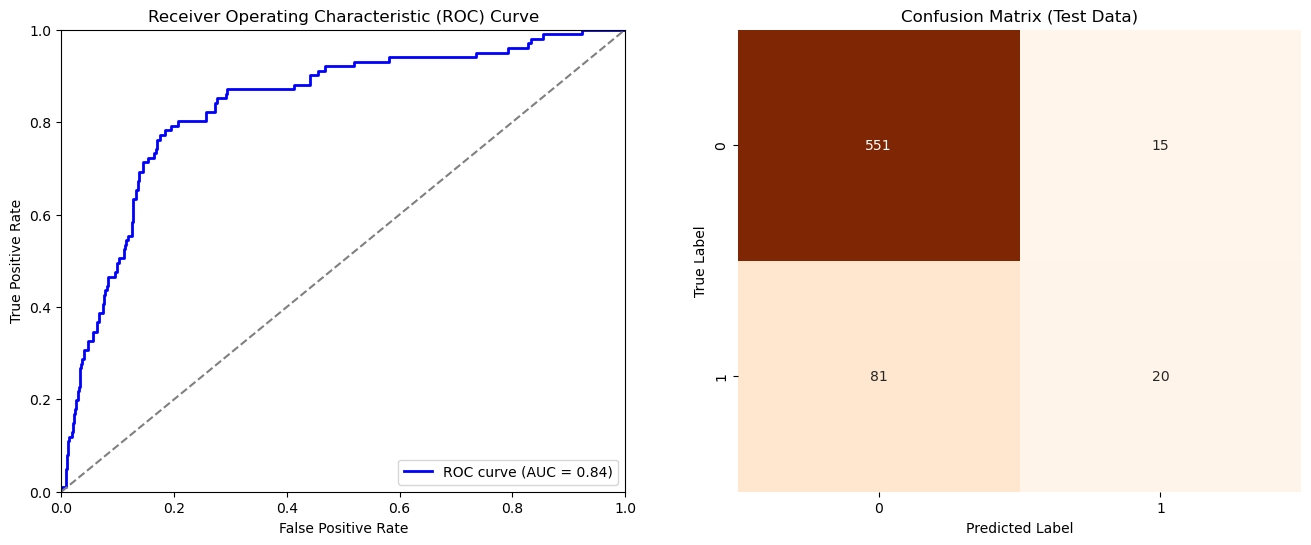

In [744]:
# Plot the ROC curve for test data
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class (churned)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot the confusion matrix as a heatmap for test data
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Oranges', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix (Test Data)')

plt.show()

These visualizations offer a comprehensive view of the model's performance, combining information from the ROC curve and the confusion matrix to assess both discrimination ability and error types in the binary classification task.

 An AUC of 0.84 indicates the model has good performance at distinguishing between customers who will churn and those who won’t.
 The confusion matrix shows the model correctly predicted 551 (true positives), while incorrectly predicting 15 (false negatives). The converse is true for negative cases (i.e. customers who did not churn). There were 101 negative cases, of which the model predicted 81 correctly (true negatives), and 20 incorrectly (false positives).

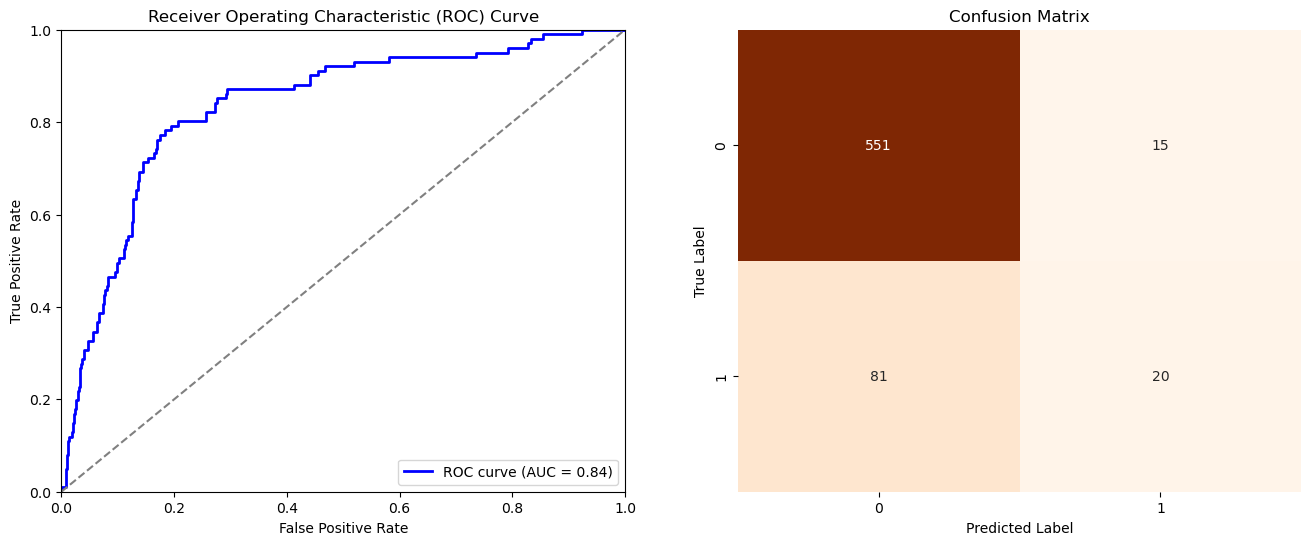

In [745]:
# Plot the ROC curve
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class (churned)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot the confusion matrix as a heatmap
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Oranges', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix')

plt.show()

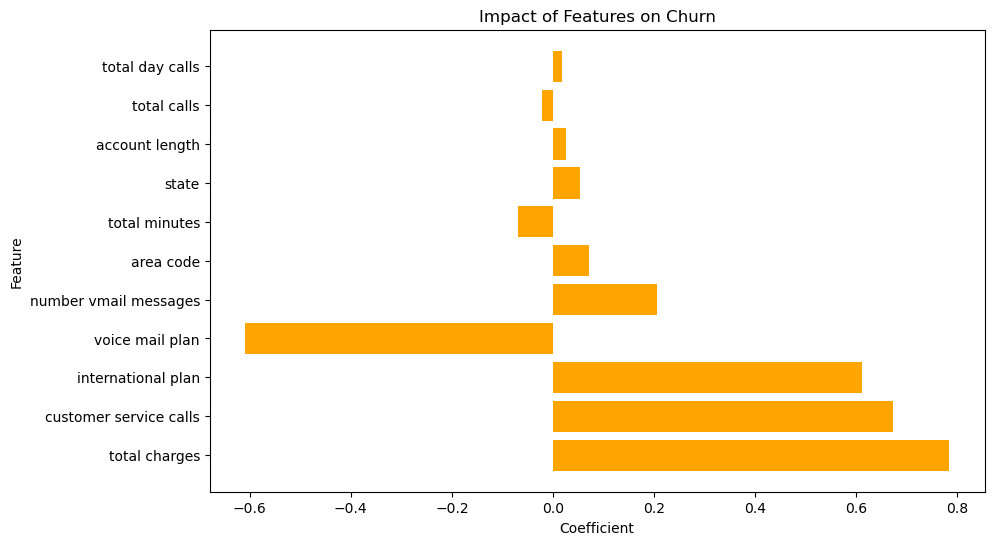

In [746]:
# Get the coefficients of the logistic regression model2
coefficients = model_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame to display the coefficients along with the corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to see the most impactful features
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the coefficients 
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='orange')  # Change the color to orange
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Impact of Features on Churn')
plt.show()


In [747]:
#see the actual coefficient arranged in descending ordger
coefficients_df

,Feature,Coefficient,Abs_Coefficient
8,total charges,0.784333,0.784333
7,customer service calls,0.672252,0.672252
3,international plan,0.611229,0.611229
4,voice mail plan,-0.609556,0.609556
5,number vmail messages,0.205182,0.205182
2,area code,0.072092,0.072092
9,total minutes,-0.068306,0.068306
0,state,0.052990,0.052990
1,account length,0.026087,0.026087
10,total calls,-0.022531,0.022531



Confusion Matrix (Test Data):
[[551  15]
 [ 81  20]]


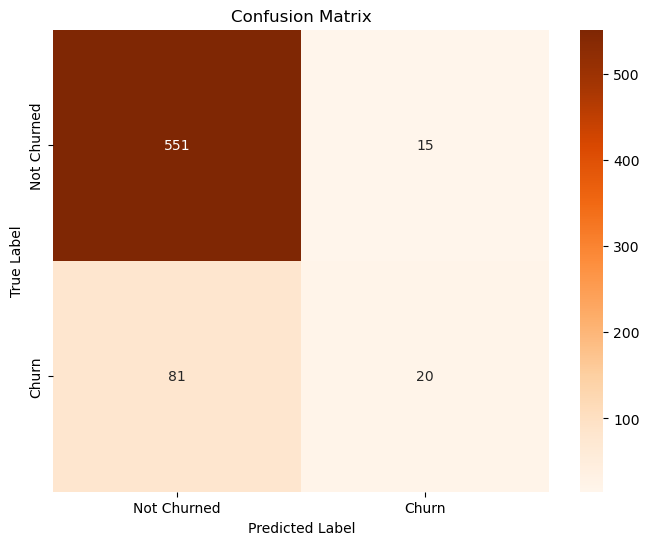

In [748]:
# Compute the confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Oranges', fmt='d', 
            xticklabels=['Not Churned', 'Churn'], 
            yticklabels=['Not Churned', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Insights
In the above confusion matrix, there is 667 samples.
- True Positives (TP): The model accurately predicted 20 samples as "Not churned" (class 0).
- True Negatives (TN): The model correctly identified 551 samples as "churned" (class 1).
- False Positives (FP): The model inaccurately classified 15 samples as "churned" when they were not churned.
False Negatives (FN): The model misclassified 81 samples as "not churned" when they were indeed churned.

### 5.2 Decision Trees

Decision trees are non-parametric supervised learning models. They can be used for both classification and regression tasks.

In [749]:
# Initialize the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Predict labels for the testing data
y_pred_tree = tree_model.predict(X_test)

# Evaluate performance on testing data
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)

# Print evaluation metrics
print("Decision Tree Evaluation Metrics:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-score:", f1_tree)
print("ROC-AUC Score:", roc_auc_tree)

Decision Tree Evaluation Metrics:
Accuracy: 0.9145427286356822
Precision: 0.7
Recall: 0.7623762376237624
F1-score: 0.7298578199052131
ROC-AUC Score: 0.8520361753489837


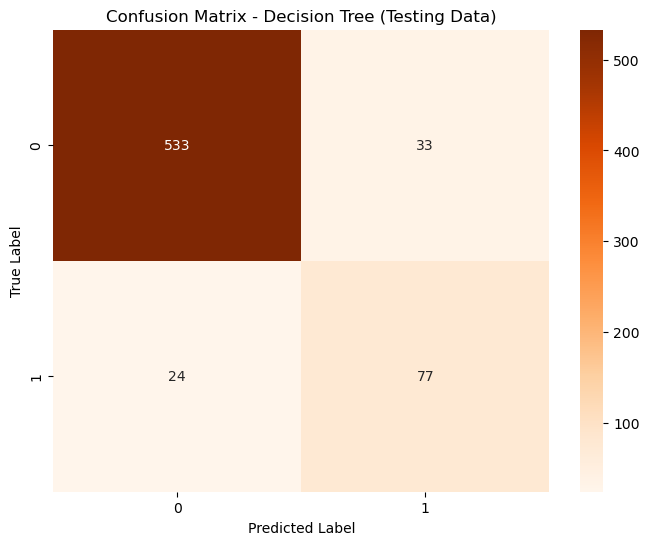

In [750]:
# Compute confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree (Testing Data)')
plt.show()

### 5.3 Random Forest

In [751]:
# Initialize the standard scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier Initialization
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

In [752]:
# Performance Evaluation
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')  # Specify average parameter
recall_rf = recall_score(y_test, y_pred, average='weighted')  # Specify average parameter
f1_rf = f1_score(y_test, y_pred, average='weighted')  # Specify average parameter

# Print evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.9460269865067467
Precision: 0.9454694949822385
Recall: 0.9460269865067467
F1-score: 0.942646258123882


In [753]:
# Performance Evaluation
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')  # Specify average parameter
recall_rf = recall_score(y_test, y_pred, average='weighted')  # Specify average parameter
f1_rf = f1_score(y_test, y_pred, average='weighted')  # Specify average parameter

# Print evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.9460269865067467
Precision: 0.9454694949822385
Recall: 0.9460269865067467
F1-score: 0.942646258123882


In [754]:
# Cross-validation to address overfitting
k = 5  # Number of folds
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Cross-Validation Accuracy
accuracy_rf_cv = np.mean(cv_scores)

# Print cross-validation accuracy
print("Cross-Validation Accuracy:", accuracy_rf_cv)

Cross-Validation Accuracy: 0.9444856687114841


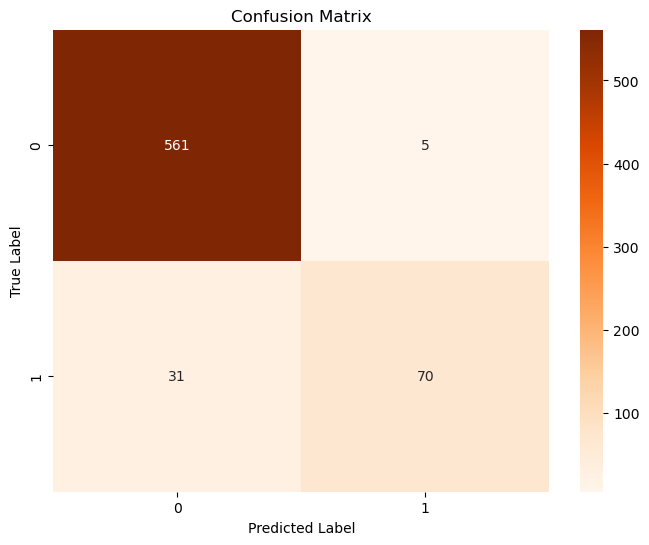

In [755]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [756]:
# Generate predictions using the random forest classifier
y_pred_rf = rf.predict(X_test_scaled)

# Import necessary libraries for the classification report
from sklearn.metrics import classification_report

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.93      0.69      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.84      0.88       667
weighted avg       0.95      0.95      0.94       667



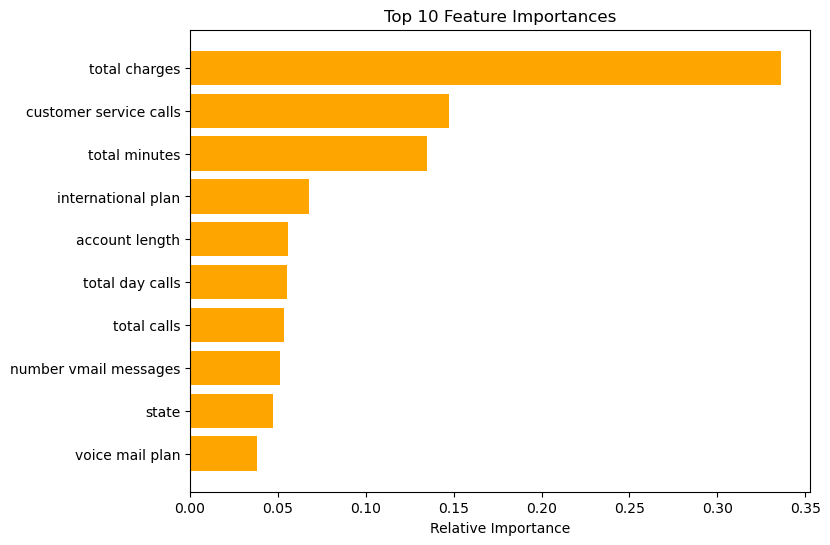

In [757]:
# Get feature names
feature_names = list(X_train.columns)

# Get feature importances
importances = rf.feature_importances_

# Get indices of top 10 features
top_indices = np.argsort(importances)[-10:]

# Plotting feature importances 
plt.figure(figsize=(8,6))
plt.barh(range(len(top_indices)), importances[top_indices], align='center', color='orange')
plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
plt.xlabel('Relative Importance')
plt.title('Top 10 Feature Importances')
plt.show()


### 5.4 XG Boost

In [758]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nXGBoost Model Accuracy:", accuracy_xgb)
print("XGBoost Model Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Cross-validate the model to get more robust estimates of performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())



XGBoost Model Accuracy: 0.9340329835082459
XGBoost Model Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       566
        True       0.84      0.70      0.76       101

    accuracy                           0.93       667
   macro avg       0.89      0.84      0.86       667
weighted avg       0.93      0.93      0.93       667

Cross-Validation Accuracy Scores: [0.94382022 0.93996248 0.95121951 0.93245779 0.94371482]
Mean CV Accuracy: 0.9422349642683979


# 6. Evaluation

This stage allows for the evaluation of the models: Logistic Regression, Decision Trees, and XG Boost.

### 6.1  Recall Score
This is a measure of how many positive instances the model correctly identifies. 

A high recall indicates a better model.

In [759]:
np.random.seed(42)

classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls
    model.fit(X_train, y_train)  # Pass X_train and y_train to the fit method
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__], 'recall': [recall]})], ignore_index=True)

# Set the name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Print the result table
print(result_table)


                          recall
classifiers                     
LogisticRegression      0.168317
DecisionTreeClassifier  0.762376
RandomForestClassifier  0.693069
XGBClassifier           0.702970


The above table shows that the DecisionTreeClassifier has the highest recall score followed by XGBClassifier then the Random Forest

### 6.2 Model Tuning

Since the DecisionTreeClassifier lead in performance it is to be enhanced so as to improve its effectiveness. 

To achieve this, Model-tuning using GridSearch.

### 6.2.1 DecisionTree Tuning 

In [760]:
# Initialize the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the evaluation metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Initialize RandomizedSearchCV with 'accuracy' as the metric for refit
random_search = RandomizedSearchCV(
    tree_model,
    param_distributions=param_dist,
    scoring='accuracy',  # Specify a single scoring metric for refit
    n_iter=10,
    cv=5,
    random_state=42,
    refit=True  # Refit the best model with the best hyperparameters on the entire dataset
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model from the search
best_tree_model = random_search.best_estimator_

# Predict labels for the testing data using the best model
y_pred_best_tree = best_tree_model.predict(X_test)

# Evaluate performance on testing data using the best model
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
precision_best_tree = precision_score(y_test, y_pred_best_tree)
recall_best_tree = recall_score(y_test, y_pred_best_tree)
f1_best_tree = f1_score(y_test, y_pred_best_tree)
roc_auc_best_tree = roc_auc_score(y_test, y_pred_best_tree)

# Print evaluation metrics for the best model
print("Best Decision Tree Evaluation Metrics:")
print("Accuracy:", accuracy_best_tree)
print("Precision:", precision_best_tree)
print("Recall:", recall_best_tree)
print("F1-score:", f1_best_tree)
print("ROC-AUC Score:", roc_auc_best_tree)


Best Decision Tree Evaluation Metrics:
Accuracy: 0.9430284857571214
Precision: 0.8888888888888888
Recall: 0.7128712871287128
F1-score: 0.7912087912087912
ROC-AUC Score: 0.8484851135290208


- The RandomSearch tuning has improved the accuracy of the model.
- The accuracy now stands at 94% and the precision is at 88%.
- The recall of the model stands at 71% which means it is able to identify churn 71% of the time.

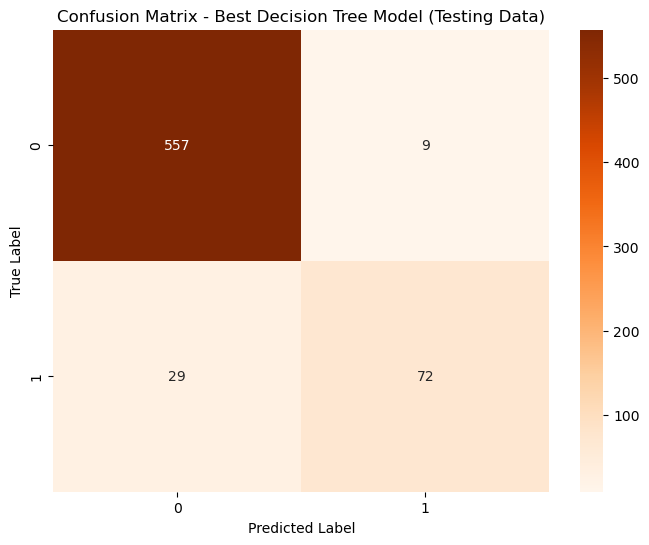

In [761]:
# Compute confusion matrix for the best model
conf_matrix_best_tree = confusion_matrix(y_test, y_pred_best_tree)

# Plot confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_tree, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best Decision Tree Model (Testing Data)')
plt.show()


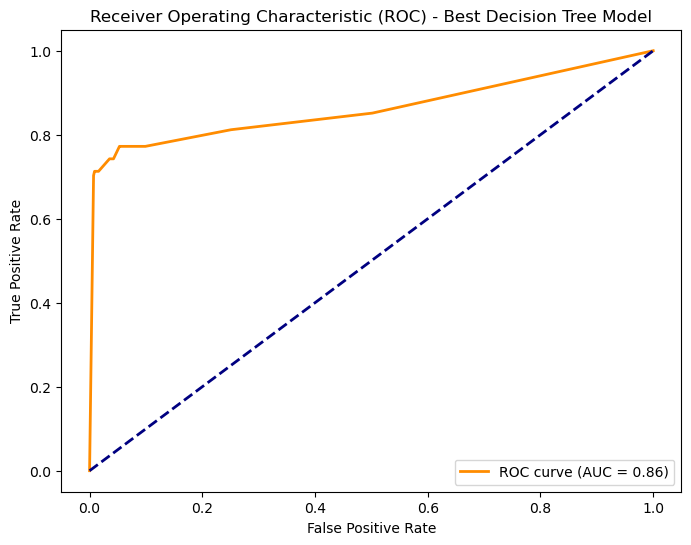

In [762]:
# Get predicted probabilities for the positive class
y_prob_best_tree = best_tree_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_tree)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Best Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

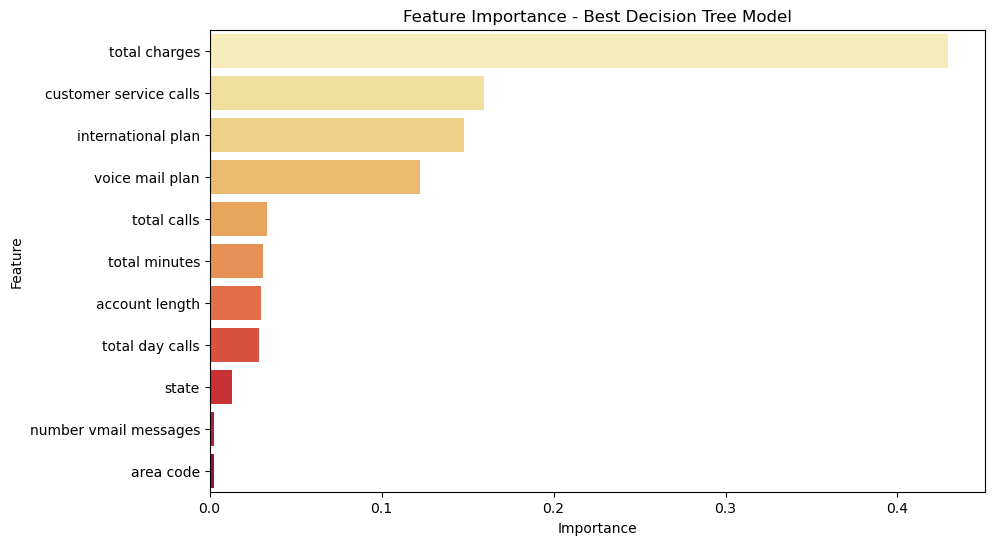

In [763]:
# feature importance

# Fit the best Decision Tree model on the entire training data
best_tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances = best_tree_model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='YlOrRd')
plt.title('Feature Importance - Best Decision Tree Model')
plt.show()

### Insights

- Total charges is the most important feature for predicting customer churn. This suggests that customers who spend more money with the telecommunications company are less likely to churn.
- Customer service calls is the second most important feature. This suggests that customers who call customer service more frequently are more likely to churn.
- International plan and Voice mail plan are also relatively important features. This suggests that customers who subscribe to these services are less likely to churn.
- Total calls, Total minutes, and Account length are also somewhat important features. This suggests that customers who use the telecommunications company's services more frequently and have been customers for a longer period of time are less likely to churn.

# 7. Conclusions and Recommendations

The preferred machine learning model for predicting customer churn is decision trees.

### Recommendations

Recommendations to reduce Customer Churn are:
1. **Total Charges**:
- **Targeted Promotions**: Offer attractive discounts or bundle deals to high-spending customers who might be considering switching providers.
- **Loyalty Programs**: Implement a tiered loyalty program rewarding high spenders with exclusive benefits like priority customer service or early access to new features.

2. **Customer Service Calls**:
- **Improved Service**: Analyze call transcripts and customer feedback to identify areas for improvement in customer service interactions.
- Proactive Outreach: Train customer service representatives to identify at-risk customers based on call frequency and proactively address their concerns.

3. **International Plan & Voice Mail Plan**:
- **Plan Bundles**: Create attractive bundled plans that combine these features with other popular services at a competitive price.
- **Targeted Upselling**: Identify customers who might benefit from these plans based on usage patterns and offer personalized upselling campaigns.

4. **Total Calls, Total Minutes & Account Length**:

- **Usage-Based Incentives**: Reward frequent callers and long-term customers with bonus minutes, data, or discounts based on their usage patterns.
- **Win-Back Campaigns**: Identify and target inactive customers with personalized offers to entice them back to using the service more frequently.